# Lab Meeting 11/2/2018

## Neural Nets

In [1]:
#load packages
library(MASS)
install.packages('neuralnet');
library(neuralnet)
#install.packages('caret');
#library(caret)
#install.packages('lattice');
#library(lattice)
#install.packages('ggplot2');
#library(ggplot2)

### The sigmoid activation function

$$\begin{equation} f(x) = 1/(1+exp(-x)) \end{equation}$$

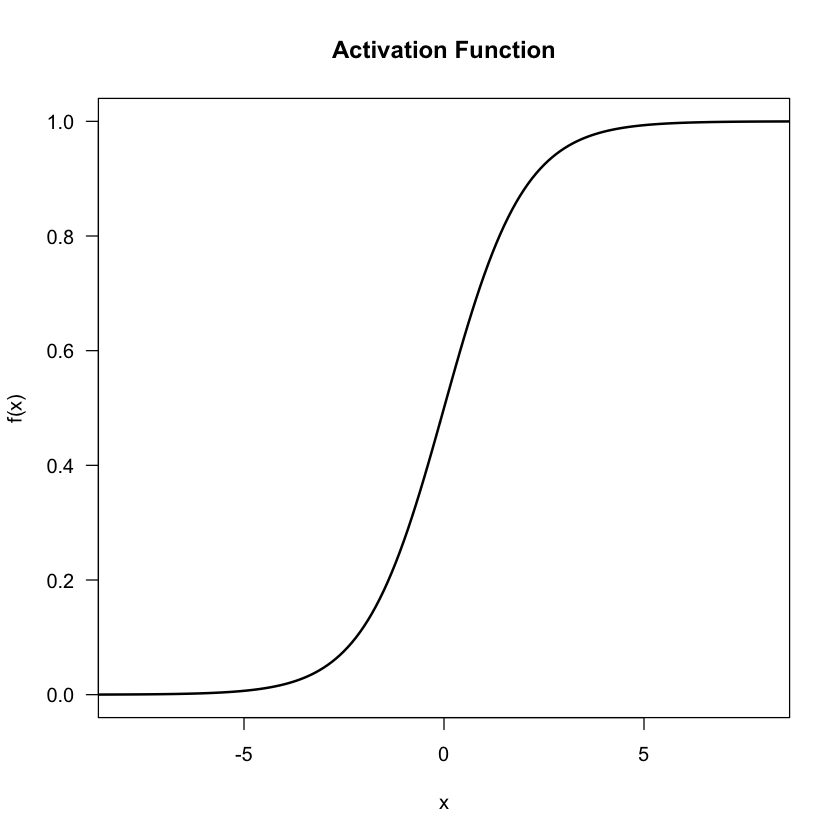

In [2]:
x = seq(-10,10,.1)
plot(x, 1/(1+exp((-1*x))), typ = 'l', 
     ylim = c(0,1), xlim = c(-8,8), 
     lwd = 2, las = 1, ylab = 'f(x)', xlab = 'x', main = 'Activation Function') 
 



### Now let's see how different weights affect the function

$$\begin{equation} f_{w}(x) = 1/(1+exp(-x*w)) \end{equation}$$

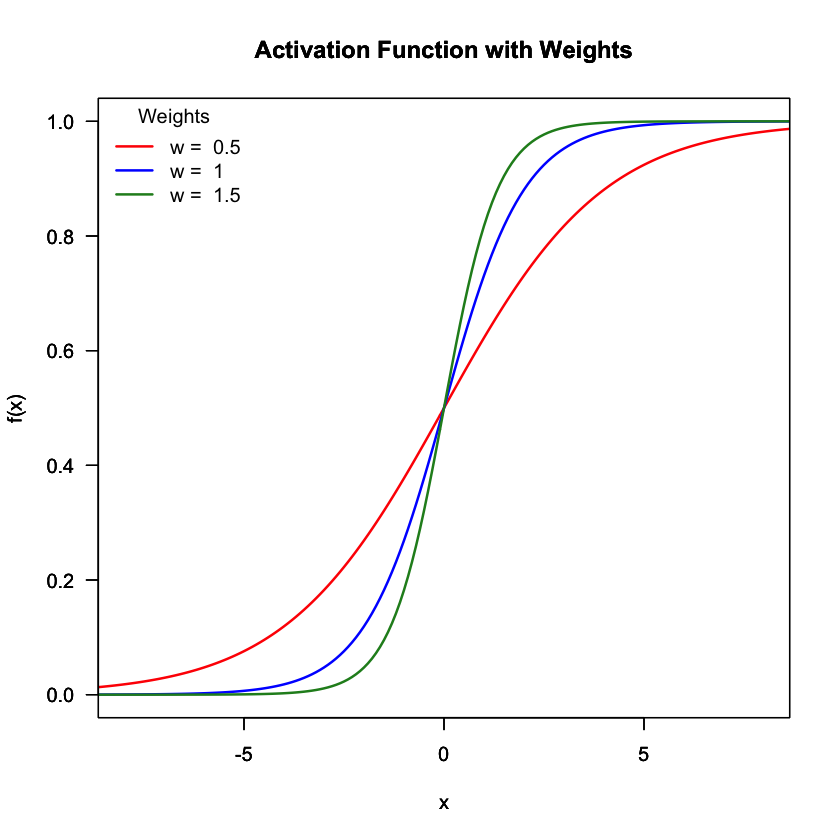

In [3]:
#make a vector of weights
w <- c(0.5,1.0,1.5)
color = c('red','blue','forestgreen')
for (i in 1:3){ 
  plot(x, 1/(1+exp((-1*x*w[i]))), 
       typ = 'l', ylim = c(0,1), xlim = c(-8,8), 
       col = color[i], lwd = 2, las = 1, ylab = 'f(x)', xlab = 'x', main = 'Activation Function with Weights') 
    par(new = T)
}
legend('topleft', col = color, legend = c(paste('w = ', w[1]),
                                                paste('w = ', w[2]),
                                                paste('w = ', w[3])), title = 'Weights', bty = 'n', lty = 1, lwd = 2)

### Now let's look at how biases affect the activation function

$$\begin{equation} f_{w,b}(x) = 1/(1+exp(-x*w+b)) \end{equation}$$

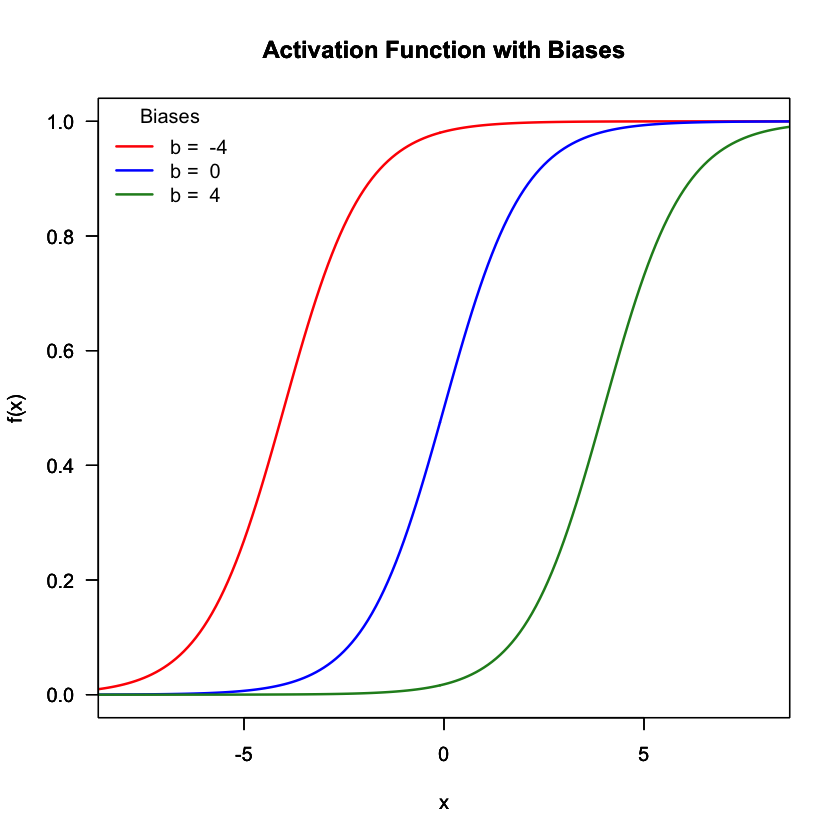

In [4]:
#make a vector of biases

b <- c(-4.0,0,4.0)
color = c('red','blue','forestgreen')
for (i in 1:3){ 
  plot(x, 1/(1+exp((-1*x*w[2]+b[i]))), 
       typ = 'l', ylim = c(0,1), xlim = c(-8,8), 
       col = color[i], lwd = 2, las = 1, ylab = 'f(x)', xlab = 'x', main = 'Activation Function with Biases') 
    par(new = T)
}
legend('topleft', col = color, legend = c(paste('b = ', b[1]),
                                                paste('b = ', b[2]),
                                                paste('b = ', b[3])), title = 'Biases', bty = 'n', lty = 1, lwd = 2)

### *The sigmoid function, like many functions, has two main parameters; weights (shape) and biases (location). A neural network adjusts the weights and biases of several nodes to fit the data*

# Now let's look at a concrete example

This example came from a blog with a lot of good tutorials that can be found _[here](https://www.r-bloggers.com/fitting-a-neural-network-in-r-neuralnet-package/)_
We will use a public dataset from R that describes housing prices around Boston
It isn't super relavant to our work but hopefully it will be illustrative
if you want to find more about the data set you can go _[here](https://www.rdocumentation.org/packages/MASS/versions/7.3-51/topics/Boston)_

In [5]:
set.seed(500)
data <- Boston
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


These are data about housing prices in individual suburbs of Boston
medv is the median cost of housing for a certain suburb
other columns include crime rates, zoning, average age, taxes, even measured NOx concentrations in the area

#### First let's fit a standard linear regression to the data for comparison to the neural net. We will split the data set up into training (calibration) and testing (validation) sets (75% and 25%), which we will use for both linear regression and the neural net

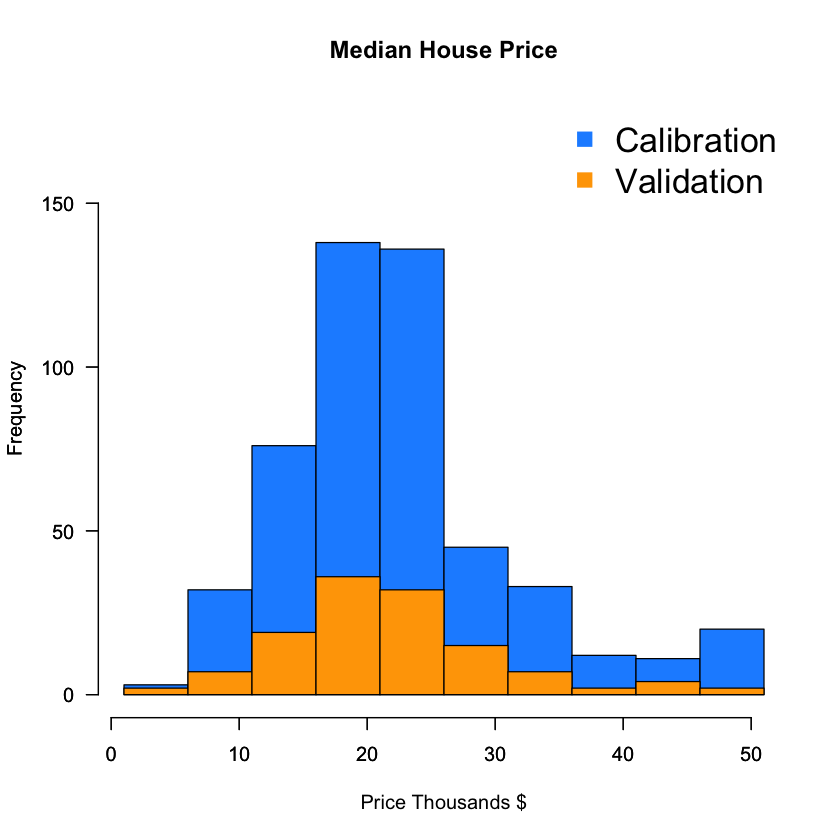

In [6]:
index <- sample(1:nrow(data),round(0.75*nrow(data)))
train <- data[index,]
test <- data[-index,]
lm.fit <- glm(medv~., data=train)
pr.lm <- predict(lm.fit,test)
MSE.lm <- sum((pr.lm - test$medv)^2)/nrow(test)

hist(data$medv, ylim = c(0,175), las = 1, col = 'dodgerblue', breaks = seq(1,55,5), main = 'Median House Price',
     xlab = 'Price Thousands $')
par(new = T)
hist(test$medv, ylim = c(0,175), las = 1, col = 'orange', breaks = seq(1,55,5), main = '', xlab = '')
legend('topright',col= c('dodgerblue','orange'), legend = c('Calibration', 'Validation'), bty = 'n', pch = 15, cex = 1.7)
#apply(scaled, 2, range)

#### Now we have to scale our data so that it ranges from 0-1

In [7]:
maxs <- apply(data, 2, max) 
mins <- apply(data, 2, min)

scaled <- as.data.frame(scale(data, center = mins, scale = maxs - mins))

#this splits the data into a training and test set
train_ <- scaled[index,]
test_ <- scaled[-index,]


#### Run the neural net

In [8]:
#set.seed(500)
n <- names(train_)

#full formula
var <- c('crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat')

#possible options for variables
#crim zn indus chas nox rm age dis rad tax ptratio black lstat
#var <- c('crim','age', 'zn')

f <- as.formula(paste("medv ~", paste(var, collapse = ' + ')))
f
nn <- neuralnet(f,data=train_,hidden=c(5,3),linear.output=T)


medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

#### Now let's see how the neural net did on the training data

[1] "Neural Net RMSE 15.75"
[1] "Linear Regression RMSE 21.63"


medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

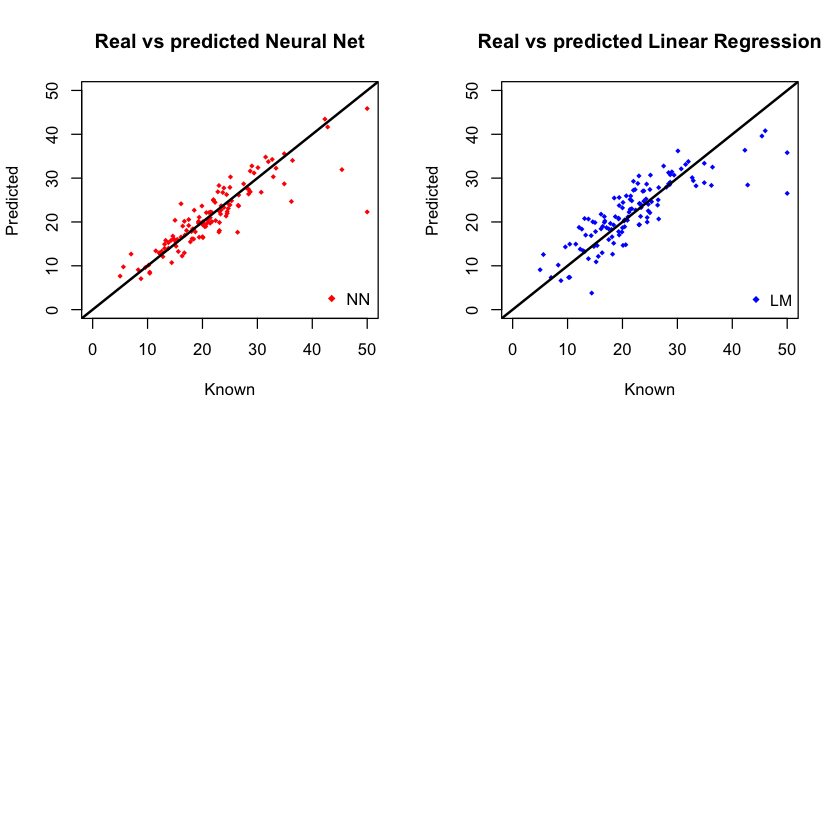

In [9]:
#using the neural net to predict
pr.nn <- compute(nn,test_[,var])
pr.nn_ <- pr.nn$net.result*(max(data$medv)-min(data$medv))+min(data$medv)
test.r <- (test_$medv)*(max(data$medv)-min(data$medv))+min(data$medv)
MSE.nn <- sum((test.r - pr.nn_)^2)/nrow(test_)

#fitting a linear regression
lm.fit <- glm(f, data=train)
pr.lm <- predict(lm.fit,test)
MSE.lm <- sum((pr.lm - test$medv)^2)/nrow(test)


#plot up the results of the validation test
par(mfrow=c(2,2))

plot(test$medv,pr.nn_,col='red',main='Real vs predicted Neural Net',pch=18,cex=0.7, ylim = c(0,50), xlim = c(0,50),
    xlab = 'Known', ylab = 'Predicted')
abline(0,1,lwd=2)
legend('bottomright',legend='NN',pch=18,col='red', bty='n')

plot(test$medv,pr.lm,col='blue',main='Real vs predicted Linear Regression',pch=18, cex=0.7, ylim = c(0,50), xlim = c(0,50),
    xlab = 'Known', ylab = 'Predicted')
abline(0,1,lwd=2)
legend('bottomright',legend='LM',pch=18,col='blue', bty='n', cex=.95)

print(paste('Neural Net RMSE',round(MSE.nn,2)))
print(paste('Linear Regression RMSE',round(MSE.lm,2)))
f
